In [274]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Heydar\Desktop\Code Academy TA\Iris.csv')

In [275]:
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-virginica':1,'Iris-versicolor':2})
df['Species'] = pd.to_numeric(df['Species'])

In [276]:
del df['Id']

In [277]:
y = df['Species']
X = df.drop('Species',axis=1)

In [278]:
results_lst = []

for j in (2,10):
    clf = DecisionTreeClassifier(max_depth=j)
    for i in range(20):
        # Adjust the threshold as needed
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        clf.fit(X_train, y_train)
        predicted_results = clf.predict( X_test )

        # print("Accuracy for Max Depth=", j,  np.mean(y_test.values == predicted_results))   
        results_lst.append(np.mean(y_test.values == predicted_results))

print('Mean of Accuracy if Max Depth = 2 :', np.array(results_lst[:20]).mean())
print('Mean of Accuracy if Max Depth = 10 :',np.array(results_lst[20:]).mean())

Mean of Accuracy if Max Depth = 2 : 0.931
Mean of Accuracy if Max Depth = 10 : 0.9530000000000001


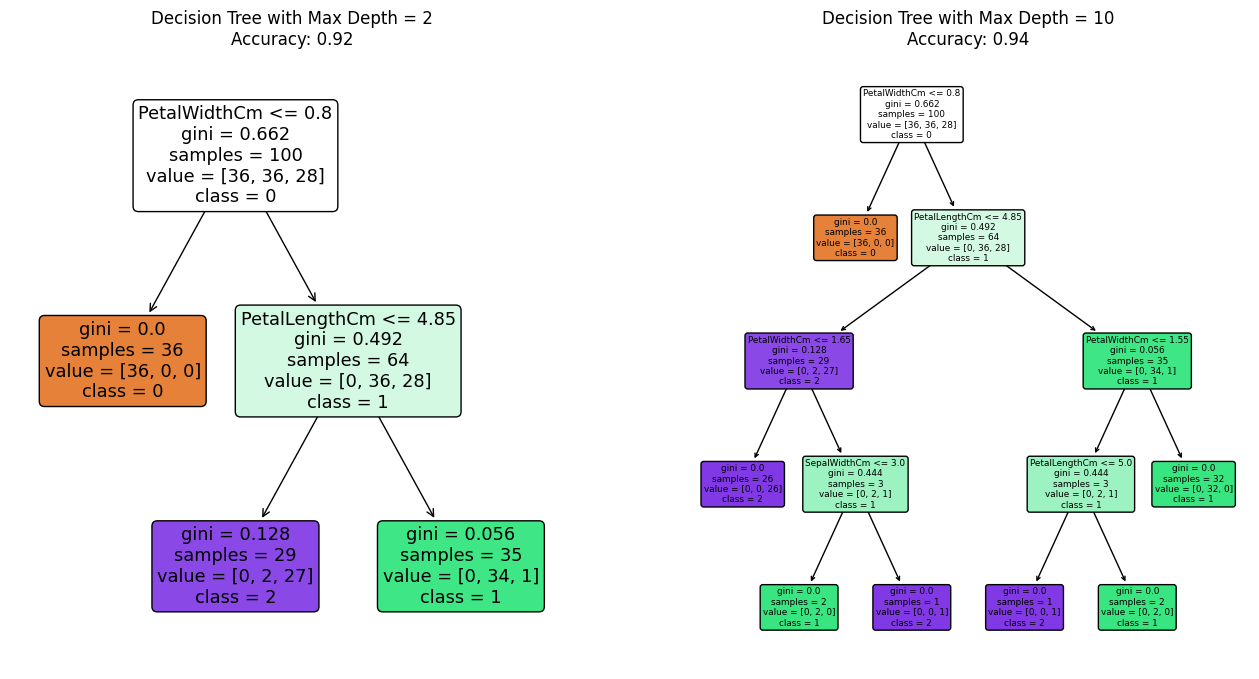

In [279]:
# First, fitting the Decision Tree with max_depth=2
clf_depth_2 = DecisionTreeClassifier(max_depth=2)
clf_depth_2.fit(X_train, y_train)
predicted_results_depth_2 = clf_depth_2.predict(X_test)
accuracy_depth_2 = np.mean(y_test.values == predicted_results_depth_2)

# Now, fitting the Decision Tree with max_depth=10
clf_depth_10 = DecisionTreeClassifier(max_depth=10)
clf_depth_10.fit(X_train, y_train)
predicted_results_depth_10 = clf_depth_10.predict(X_test)
accuracy_depth_10 = np.mean(y_test.values == predicted_results_depth_10)

# Prepare class names as strings
class_names_str = [str(cls) for cls in np.unique(y_train)]

# Plotting both trees side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Plot for max_depth=2
tree.plot_tree(clf_depth_2,
               filled=True,
               rounded=True,
               class_names=class_names_str,
               feature_names=X.columns,
               ax=axes[0])
axes[0].set_title('Decision Tree with Max Depth = 2\nAccuracy: {:.2f}'.format(accuracy_depth_2))

# Plot for max_depth=10
tree.plot_tree(clf_depth_10,
               filled=True,
               rounded=True,
               class_names=class_names_str,
               feature_names=X.columns,
               ax=axes[1])
axes[1].set_title('Decision Tree with Max Depth = 10\nAccuracy: {:.2f}'.format(accuracy_depth_10))

plt.show()
